# Exploring the Discrete Fourier Transform  

### George Tzanetakis, University of Victoria 

In this notebook we will explore the Discrete Fourier Transform which is a fundamental algorithm in Digital Signal Processing. First let's look at the mathematical notation: 

\begin{equation} 
X_k = <x, e^{jtk2\pi /N}> = \sum_{t=0}^{N-1} x_t e^{-j t k 2 \pi/N}  
\end{equation} 

We start with a finite, length-N segment of a digital signal $x_0, x_1, \dots, x_{N-1}$. We define the inner product as expected: 
\begin{equation} 
<x,y> = \sum_{t=0}^{N-1} x_t y_t^*
\end{equation}
and the corresponding basis is N frequency phasors equally spaced in the desired rage from zero to the sampling frequency: 
\begin{equation} 
{e^{jtk2\pi/N}} = {cos(tk2\pi/N) + j sin(tk2\pi/N})\;\;\; \text{for} \;\; 0 \leq K \leq N-1
\end{equation} 



In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd


Let's plot the real part of one of these basis functions - let's say for $k=4$. 

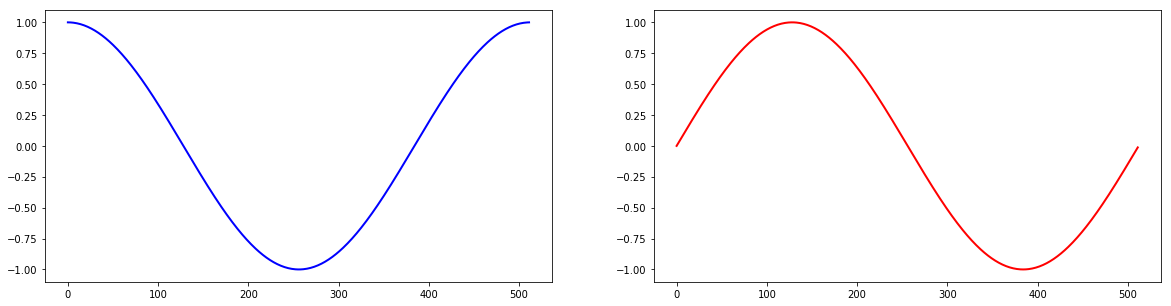

In [2]:
def plot_basis(t, x_re, x_im): 
    # plot them 
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.plot(t, x_re, lw=2, color='blue')
    plt.subplot(122)
    plt.plot(t, x_im, lw=2, color='red')

N = 512 
t = np.arange(0,N)

# basis function real and imaginary parts for k=4
k = 1
x_re = np.cos(k*t*2*np.pi/N)
x_im = np.sin(k*t*2*np.pi/N)

plot_basis(t, x_re, x_im) 


Let's plot the real and imaginary parts of a basis function with higher frequency with k=10 


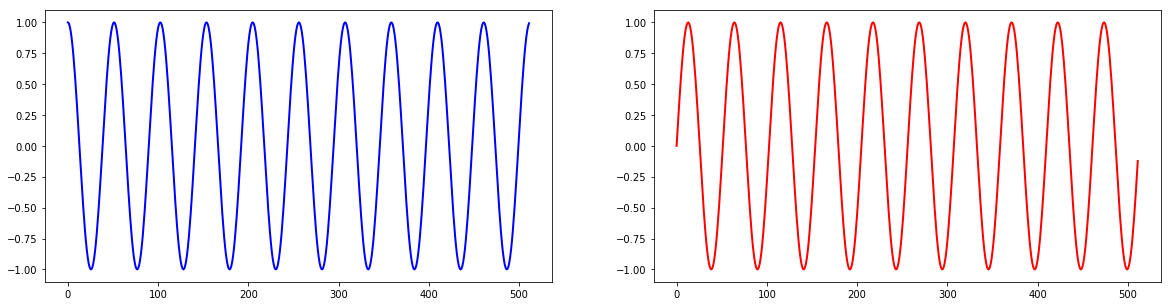

In [3]:
# basis function real and imaginary parts for k=10 
k = 10 
x_re = np.cos(k*t*2*np.pi/N)
x_im = np.sin(k*t*2*np.pi/N)

plot_basis(t, x_re, x_im) 

\begin{equation} 
X_k = <x, e^{jtk2\pi /N}> = \sum_{t=0}^{N-1} x_t e^{-j t k 2 \pi/N}  = \sum_{t=0}^{N-1} x_t cos(tk2\pi/N) + \sum_{t=0}^{N-1} x_t  j sin(tk2\pi/N)
\end{equation} 

Looking at the equation above you can see that for a specific k the complex spectrum value X_k can be computed by taking two inner products for the input signal $x_t$ with the real and imaginary parts of the corresponding basis function. 

Let's consider as input a cosine signal of the same frequency as a particular pair of basis functions let's say with $k=4$ and look at the signal resulting from the point-wise multiplication of the input with the real part and the imagine part. As you can see the point-wise multiplication with the real part results in a signal that is centered above zero and therefore the inner product is positive (the value is shown with the straight black line in the plot). The point-wise multiplication with the imaginary part results in a signal that is centered at zero and therefore the inner product is zero (the value is shown with the straight black line in the plot). Recall from before when we examined using the inner product with a sinusoid of known frequency to estimate amplitude that the estimated amplitude is simply twice the inner product. 

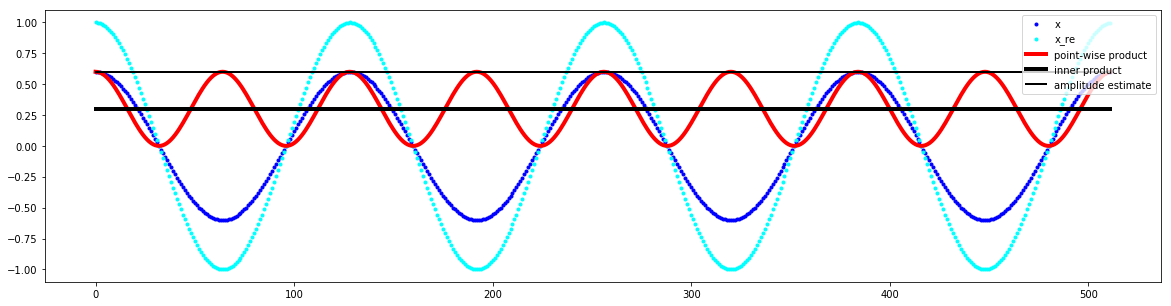

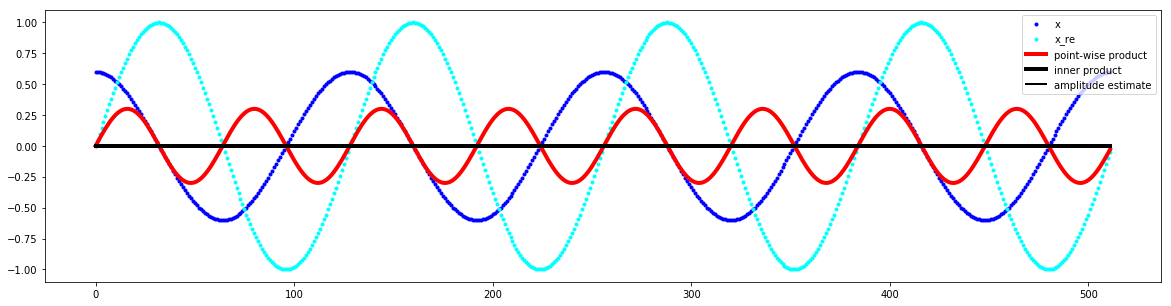

In [4]:
def plot_product(t,x1,x2): 
    prod = np.multiply(x1,x2)
    inner_prod = np.sum(prod) / len(prod)
    plt.figure(figsize=(20,5))
    plt.plot(t, x1,'.', lw=1, color='blue')
    plt.plot(t, x2,'.', lw=1, color='cyan')
    plt.plot(t, np.multiply(x1,x2), lw=4, color='red')
    ip_line = np.empty(len(prod))
    ip_line.fill(inner_prod)
    plt.plot(t, ip_line, lw=4, color='black')
    plt.plot(t, ip_line*2, lw=2, color='black')
    plt.legend(('x', 'x_re', 'point-wise product', 'inner product', 'amplitude estimate'), loc='upper right')
    

k=4 
a = 0.6
x = a * np.cos(k*t*2*np.pi/N)
x_re = np.cos(k*t*2*np.pi/N)
x_im = np.sin(k*t*2*np.pi/N)
plot_product(t,x,x_re)
plot_product(t,x,x_im)



When the input is a sine wave the inner product with the real part of the basis is zero and the inner product with the imaginary part of the basis is positive. 

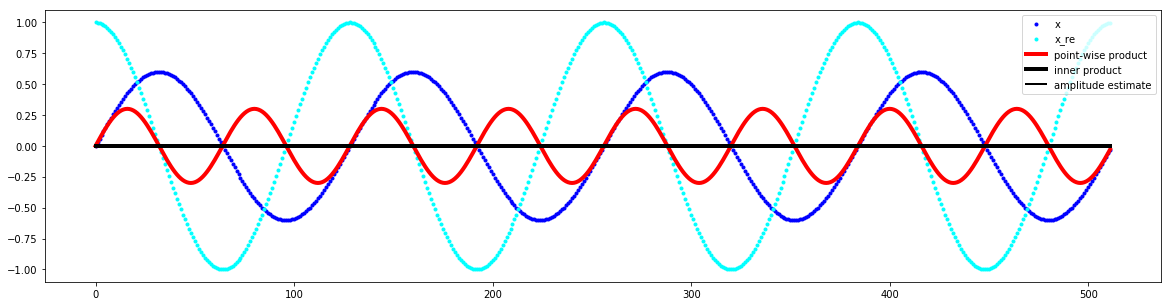

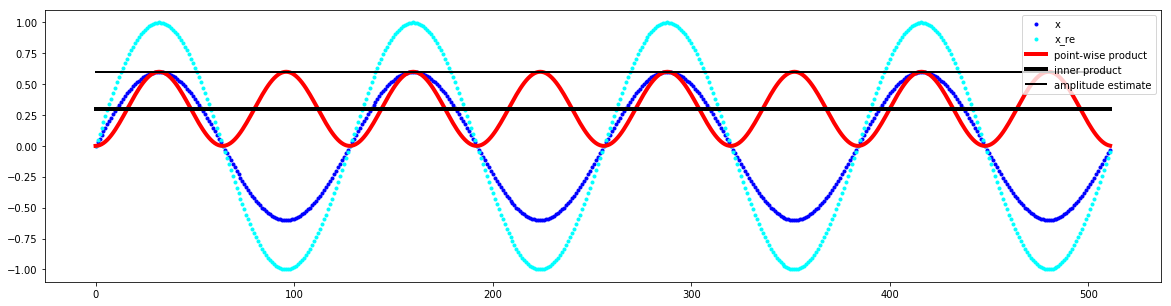

In [5]:
x = a * np.sin(k*t*2*np.pi/N)
plot_product(t,x,x_re)
plot_product(t,x,x_im)


Now let's consider the case of using as input a sinusoidal signal of different frequency let's say corresponding to k=10. As you can observe in this case the inner products with both the real and imaginary part of the basis functions are zero. 

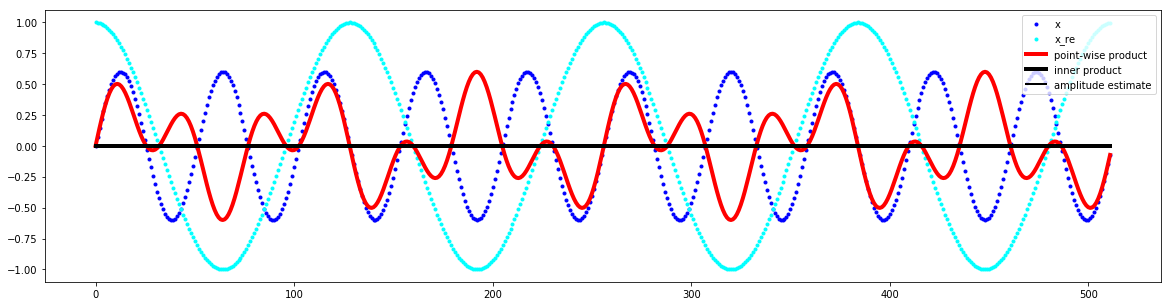

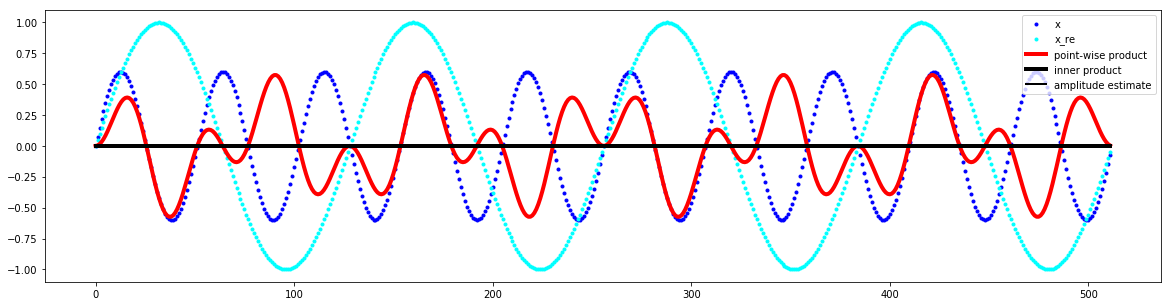

In [6]:
k=10
x = a * np.sin(k*t*2*np.pi/N)
plot_product(t,x,x_re)
plot_product(t,x,x_im)

Now consider an input that is a mixure of two sinsoids. Notice that we are still able to correctly estimate the amplitude of the mixture component that corresponds to the basis function we are using. 

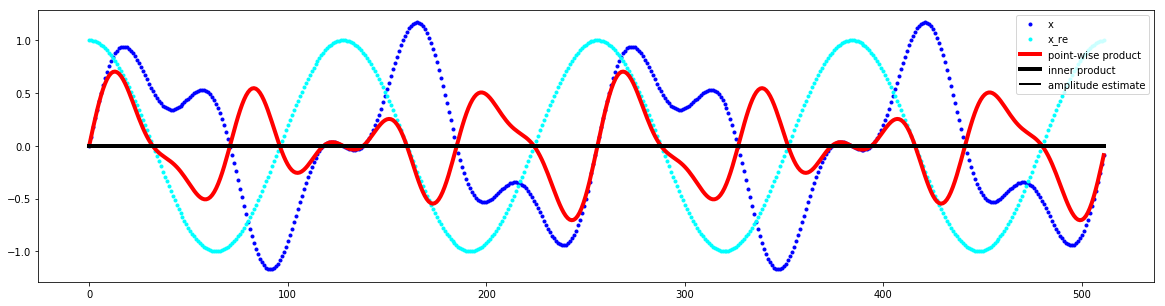

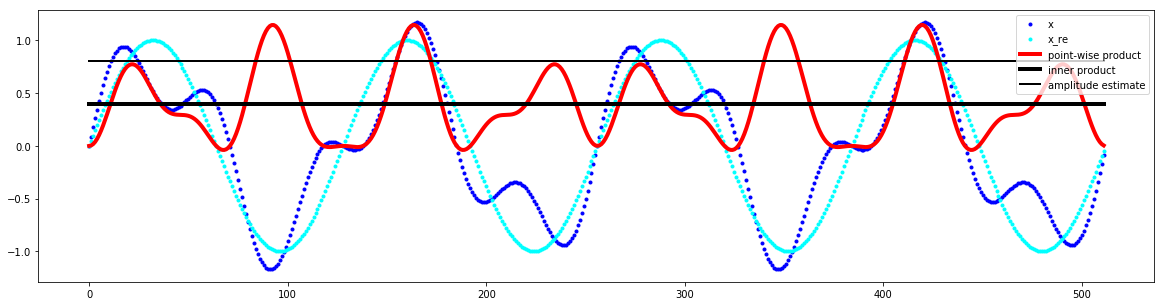

In [7]:
k=4
a1 = 0.8 
x1 = a1 * np.sin(k*t*2*np.pi/N)
a2 = 0.4 
k = 10 
x2 = a2 * np.sin(k*t*2*np.pi/N)
x = x1+x2
plot_product(t,x,x_re)
plot_product(t,x,x_im)

Finally lets look at computing the Discrete Fourier Transform directly from the equation and viewing the magnitude spectrum for the mixture signal we examined above. The code is written so that the connection to measuring amplitude and phases using inner products with the real and imaginary parts of each basis element is emphasized and the code does not utilize the complex number type. Notice the normalization by 2/N so that the mangitude spectrum shows the estimated amplitudes of the input signal. 

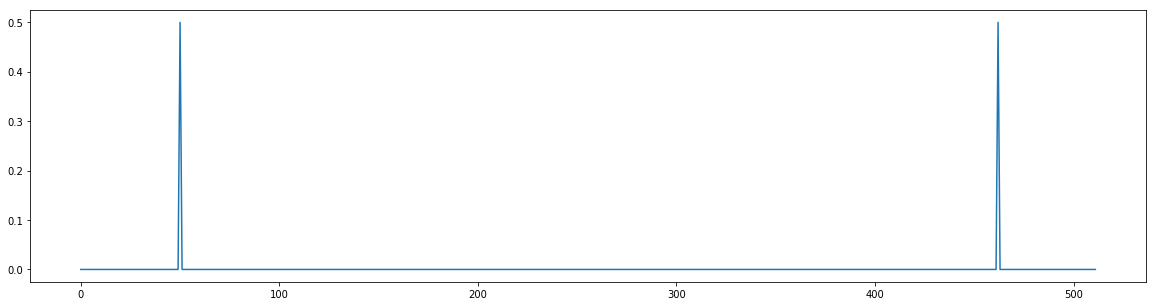

In [8]:
def pedagogical_dft(x, N):         
    X_re = np.zeros(N)       # array holding the real parts of the spectrum 
    X_im = np.zeros(N)       # array holding the imaginary values of the spectrum 
    for k in np.arange(0,N): 
        for t in np.arange(0,N): 
            X_re[k] += x[t] * np.cos(t * k * 2 * np.pi / N)   # inner product with real basis k 
            X_im[k] += x[t] * np.sin(t * k * 2 * np.pi / N)   # inner product with imaginary basis k
    return (X_re, X_im)

def plot_mag_spectrum(Xmag): 
    plt.figure(figsize=(20,5))
    n = np.arange(0,len(Xmag))
    plt.plot(n,Xmag)

N = 512 
n = np.arange(0,N)

# Single sinusoid 
k=50
x1 = 0.5 * np.sin(k*n*2*np.pi/N)

(X_re, X_im) = pedagogical_dft(x1, N)
Xmag = 2 * np.sqrt(X_re * X_re + X_im * X_im) /N
plot_mag_spectrum(Xmag)

In [ ]:
# Mixture sinusoid input 
x2 = np.sin(50*n*2*np.pi/N) + 0.5 * np.sin(100 * n * 2 * np.pi/N) + 0.3 * np.sin(300 * n * 2 * np.pi/N)

(X_re, X_im) = pedagogical_dft(x2, N)
Xmag = 2 * np.sqrt(X_re * X_re + X_im * X_im) / N 
plot_mag_spectrum(Xmag)
        

Finally let's check that we get similar results with the library implementation of the Fast Fourier Transform - notice the computation is much faster. 

In [ ]:
X = np.fft.fft(x1)
Xmag = 2 * np.abs(X) / N 
plot_mag_spectrum(Xmag)

X = np.fft.fft(x2)
Xmag = 2 * np.abs(X) / N 
plot_mag_spectrum(Xmag)

In [ ]:
%%time
import numpy as np
import timeit 


def pedagogical_dft(x, N):         
    X_re = np.zeros(N)       # array holding the real parts of the spectrum 
    X_im = np.zeros(N)       # array holding the imaginary values of the spectrum 
    for k in np.arange(0,N):
        
        for t in np.arange(0,N): 
            X_re[k] += x[t] * np.cos(t * k * 2 * np.pi / N)   # inner product with real basis k 
            X_im[k] += x[t] * np.sin(t * k * 2 * np.pi / N)   # inner product with imaginary basis k
    return (X_re, X_im)

def test(): 
    x = np.zeros(512)
    pedagogical_dft(x,512)

test()